<a href="https://colab.research.google.com/github/docheem/NLP-Portfolio/blob/main/PR_Transformers_TXT_Class_Portfolio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Building emotion detector

In [ ]:
!pip install -q transformers
!pip install -q torch
!pip install datasets
!nvidia-smi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 68.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 120.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 22.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 31.8 MB/s eta 0:00:00
Tue Apr 11 16:4

In [ ]:
from transformers import pipeline
import pandas as pd

Sentiment analysis with BERT

In [ ]:
mymodel_name = "distilbert-base-uncased-finetuned-sst-2-english"

my_classifier = pipeline("sentiment-analysis",
                      model = mymodel_name)
 

sentence = 'I enjoyed the hotel a lot'

sentiment = my_classifier(sentence)[0]['label']

print(f"The sentiment of the sentence '{sentence}' is: {sentiment}")



The sentiment of the sentence 'I enjoyed the hotel a lot' is: POSITIVE


Text Classifications

In [ ]:
mymodel_name = "distilbert-base-uncased-finetuned-sst-2-english"

text = """Dear Amazon, last week I ordered an Optimus Prime action figure,
from your online store in Germany. Unfortunately, when I opened the package,
I discovered to my horror that I had been sent an action figure of Megatron
instead! As a lifelong enemy of the Decepticons, I hope you can understand my
dilemma. To resolve the issue, I demand an exchange of Megatron for the
Optimus Prime figure I ordered. Enclosed are copies of my records concerning
this purchase. I expect to hear from you soon. Sincerely, Bumblebee."""


classifier = pipeline("text-classification", model = mymodel_name )

outputs = classifier(text)
pd.DataFrame(outputs)
     

,label,score
0,NEGATIVE,0.843714


Question answering

In [ ]:
the_reader = pipeline("question-answering", 
                      model = 'distilbert-base-cased-distilled-squad')

input_question = "What does the customer want?"

outputs = the_reader(question = input_question, context = text)


pd.DataFrame([outputs])

,score,start,end,answer
0,0.61267,336,359,an exchange of Megatron


In [ ]:
from transformers import pipeline

import pandas as pd

#model_name = "facebook/bart-base"
#mymodel_name = "distilbert-base-uncased-finetuned-sst-2-english"


nlp = pipeline("question-answering", model = 'distilbert-base-cased-distilled-squad')

my_context = text


my_quest = nlp(question = 'what did the customer ordered?',
               context =  my_context)
my_quest

{'score': 0.3411255180835724,
 'start': 33,
 'end': 63,
 'answer': 'an Optimus Prime action figure'}

Name Entity Recognition with BERT-large-cased

In [ ]:
cmytext = """Dear Amazon, last week I ordered an Optimus Prime action figure
    from your online store in Germany. Unfortunately, when I opened the package,
    I discovered to my horror that I had been sent an action figure of Megatron
    instead! As a lifelong enemy of the Decepticons, I hope you can understand my
    dilemma. To resolve the issue, I demand an exchange of Megatron for the
    Optimus Prime figure I ordered. Enclosed are copies of my records concerning
    this purchase. I expect to hear from you soon. Sincerely, Bumblebee."""

cmodel_name = "dbmdz/bert-large-cased-finetuned-conll03-english"

ner_tagger = pipeline("ner",
                      model = cmodel_name)

bert_output = ner_tagger(cmytext)

d_df = pd.DataFrame(bert_output)
d_df


,entity,score,index,word,start,end
0,I-ORG,0.879010,2,Amazon,5,11
1,I-MISC,0.994601,9,Op,36,38
2,I-MISC,0.987668,10,##ti,38,40
3,I-MISC,0.992774,11,##mus,40,43
4,I-MISC,0.988392,12,Prime,44,49
5,I-LOC,0.999755,20,Germany,94,101
6,I-MISC,0.556571,44,Mega,216,220
7,I-PER,0.590255,45,##tron,220,224
8,I-ORG,0.654191,54,Dec,265,268
9,I-ORG,0.685193,55,##ept,268,271


Summarization with Transformers

In [ ]:
text_sum = '''Transformer is a type of deep learning architecture that was 
introduced in a 2017 paper by Vaswani et al. called "Attention is All You Need."
The Transformer architecture is specifically designed for processing sequences of data, 
such as natural language text, and has proven to be very effective in a variety of natural
language processing tasks, including but not limited to: machine translation, text generation, 
and Named Entity Recognition (NER).'''

sum_model = 'sshleifer/distilbart-cnn-12-6'


summarizer = pipeline("summarization",
                      model = sum_model )

mytxt_outputs = summarizer(text_sum, max_length = 98,
                     clean_up_tokenization_spaces = True) 

print(mytxt_outputs[0])#['summary_text'])

{'summary_text': ' Transformer is a type of deep learning architecture that was introduced in a 2017 paper by Vaswani et al. called "Attention is All You Need" The architecture is specifically designed for processing sequences of data, such as natural language text, and has proven to be very effective in a variety of natural language processing tasks.'}


Text generations with GPT2

In [ ]:
gen_model = 'gpt2'

generator = pipeline("text-generation", model = gen_model)

auto_response = "Dear Bumblebee, I am sorry to hear that your order was mixed up." 

prompt = "\n\nCustomer service response:\n" + auto_response

gen_outputs = generator(prompt,
                    max_length = 512) 

print(gen_outputs[0]['generated_text'])

/usr/local/lib/python3.9/dist-packages/transformers/generation/utils.py:1201: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.




Customer service response:
Dear Bumblebee, I am sorry to hear that your order was mixed up. My order and the other customers I've spoken to have confirmed the problem is with an error in order number 7. You did correct that order number on your invoice.

Here is the email you've sent me:

I am glad you're here, and with the email to say congratulations, I'm in good hands.

Thank you very much for helping you get to this point. Thank you again. If you would like an update if these problems are in fact with your order or even made to correct it, please take a moment to read through the email I sent you. I am a big fan of your products, and if you are seeing problems like these make me a little sad. I want to know what advice you've taken and if there are any questions you'd like me to ask.

Your support staff will do their best to respond to any problem you encounter directly to ensure they have solved the issue. I am sorry for the inconvenience for everyone involved, but I can't give 

#Building Emotion Detector 

We’ll use a great dataset from an article that explored how emotions are represented in English Twitter messages.

Our dataset contains six basic emotions: 

- Anger
- Disgust
- Fear
- Joy
- Sadness
- Surprise. 

Given a tweet, our task will be, to train a model that can classify it into one of these emotions.

In [ ]:
from datasets import load_dataset

In [ ]:
emotions = load_dataset("emotion")
emotions


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

Exploring the datasets

In [ ]:
# The length of the datasets we are working with is 16000 rows and 2 columns

# len(emotions)
emotions.shape

{'train': (16000, 2), 'validation': (2000, 2), 'test': (2000, 2)}

In [ ]:
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [ ]:
#accessing rows via indexes

train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [ ]:
# The column names

train_ds.column_names

['text', 'label']

In [ ]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [ ]:
train_ds.features['label'].names


['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

the data type of the text column is string, while the label column is a special ClassLabel object that contains information about the class names and their mapping to integers.

In [ ]:
# accessing several rows with a slice
train_ds[:5]


{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

In [ ]:
# accessing the column by name

train_ds["text"][:5]



['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

In [ ]:
# Placing the dataset into a dataframe

emotions.set_format(type = "pandas")

df = emotions["train"][:]
    
    
df.head()

#pd.DataFrame(train_ds).head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [ ]:
# the labels are represented as integers, 
# so let’s use the int2str() method of the 
# label feature to create a new column in our 
# DataFrame with the corresponding label names


def label_int2str(row):

    return emotions["train"].features["label"].int2str(row)


df["label_name"] = df["label"].apply(label_int2str)


df.head(10)




,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger
5,ive been feeling a little burdened lately wasn...,0,sadness
6,ive been taking or milligrams or times recomme...,5,surprise
7,i feel as confused about life as a teenager or...,4,fear
8,i have been with petronas for years i feel tha...,1,joy
9,i feel romantic too,2,love


In [ ]:
# function to remove stopwords. 


# from transformers import BasicTokenizer

# tokenizer = BasicTokenizer(do_lower_case=True,do_stopwords=True)
                           

# text = "This is an example sentence that includes some stop words like the, and, a, etc."

# tokens = tokenizer.tokenize(text)


# print(tokens)


Class Distribution

Lets look at the distributions acrocss classes with Pandas and Matplotlib

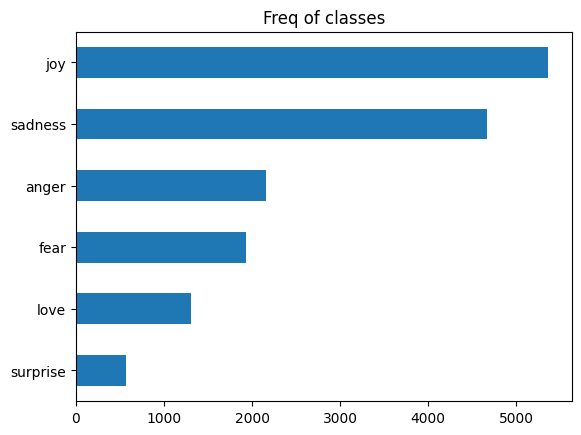

In [ ]:
import matplotlib.pyplot as plt

df["label_name"].value_counts(ascending = True).plot.barh()

plt.title('Freq of classes')

plt.show()

we can see that the dataset is heavily imbalanced; the joy and sadness classes appear frequently, whereas love and surprise are about 5–10 times rarer.

we can: 
- Randomly oversample the minority class.
- Randomly undersample the majority class.
- Gather more labeled data from the underrepresented classes.

Lets check the length of our tweets

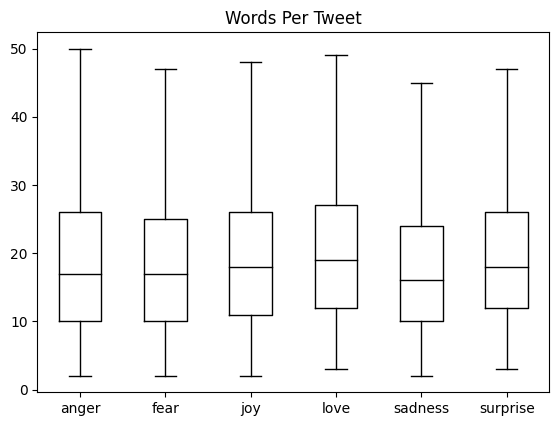

In [ ]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)

df.boxplot("Words Per Tweet",
                      
                      by = "label_name", 

                      grid = False,

                      showfliers = False, 

                      color = "black")
           
           
plt.suptitle("")

plt.xlabel("")


plt.show()

#Tokenization

Tokenization with Transformers

In [ ]:
from transformers import AutoTokenizer


tok_text = 'tokenizing text is a core process in the NLP world '

tok_model = "distilbert-base-uncased"


tokenizer = AutoTokenizer.from_pretrained(tok_model)

In [ ]:
from transformers import DistilBertTokenizer


distilbert_tokenizer = DistilBertTokenizer.from_pretrained(tok_model)


encoded_text = tokenizer(tok_text) 

print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 2832, 1999, 1996, 17953, 2361, 2088, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


the words have been mapped to unique integers in the input_ids field

In [ ]:
# convert them back into tokens 
# by using the tokenizer’s convert_ids_to_tokens() method

mytokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids) 
print(mytokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'process', 'in', 'the', 'nl', '##p', 'world', '[SEP]']


3 things happened in the code above:

- [CLS] and [SEP] tokens have been added to the start and end of the sequence to indicate the start and end of a sequence.
- the tokens have been lowercased.
- “tokenizing” and “NLP” have been split into two tokens

note: The ## prefix in ##izing and ##p means that the preceding string is not whitespace; any token with this prefix should be merged with the previous token when you convert the tokens back to a string. The AutoTokenizer class has a convert_tokens_to_string() method for doing just that. 

lets do it.

In [ ]:
# converting tokens to string using the 
# convert_tokens_to_string() method

tokenizer.convert_tokens_to_string(mytokens)

'[CLS] tokenizing text is a core process in the nlp world [SEP]'

In [ ]:
# attributes information about the AutoTokenizer

#  we can get the vocab size

tokenizer.vocab_size

30522

In [ ]:
#  we can get the corresponding model’s maximum context size

tokenizer.model_max_length

512

In [ ]:
#  we can get info about its its forward pass
tokenizer.model_input_names

['input_ids', 'attention_mask']

Input_ids are like the words in a story, and the attention mask tells the computer which words are more important when generating the next word in the story.

Tokenizing the Dataset

In [ ]:
# processing function to tokenize

def tokenize(batch):
  
  return tokenizer(batch["text"],    # apply tokenizer to batch
                   
                  padding = True,    # will pad with zeros to the size of the longest one in a batch
                   
                  truncation = True) # will truncate the examples to the model’s maximum context size


In [ ]:
print(tokenize(emotions["train"].str()))

AttributeError: ignored

In [ ]:
emotions_encoded = emotions.map(gtokenize,
                                batched = True,
                                batch_size = None)


Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
print(emotions_encoded["train"].column_names)

['input_ids', 'attention_mask']

In [ ]:
emotions_encoded["train"]

Dataset({
    features: ['input_ids', 'attention_mask'],
    num_rows: 16000
})

#Trainning a text classiier

Using pretrained models

AutoModel has a from_pretrained() method to load the weights of a pretrained model

- AutoModel is a class  from transformers:
- convert token encodings to embeddings, 
- feeds them through the encoder stack to return the hidden states

In [ ]:
import torch
import torch.nn as nn
from transformers import AutoModel

model_ckpt = "distilbert-base-uncased"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
model = AutoModel.from_pretrained(model_ckpt).to(device)


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Extracting the last hidden states example

In [ ]:
#assigning the model
distil_model = "distilbert-base-uncased"
le_tokenizer = AutoTokenizer.from_pretrained(distil_model)


# encoding the string
le_text = "NLP with transformers is the best"

#converting the tokens to PyTorch tensors
b_inputs = le_tokenizer(le_text, return_tensors="pt") 

print(f"Input tensor shape: {b_inputs['input_ids'].size()}")

Input tensor shape: torch.Size([1, 9])


In [ ]:
# placing them on the same device as the model and pass the inputs


myinputs = {k:v.to(device) for k,v in b_inputs.items()}
with torch.no_grad():
  gpu_outputs = model(**myinputs) 

print(gpu_outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.2806, -0.2666,  0.2087,  ..., -0.1755,  0.4109,  0.2542],
         [ 0.2638, -0.7865,  0.1910,  ..., -0.2037,  0.5783,  0.1240],
         [-0.1940, -0.4371,  0.1721,  ..., -0.3429, -0.0959, -0.0450],
         ...,
         [-0.5964, -0.7274,  0.2087,  ..., -0.0655,  0.7360, -0.2090],
         [-0.6940, -0.3125,  0.2654,  ..., -0.0065,  0.5502, -0.5472],
         [ 0.7844,  0.0143, -0.2311,  ...,  0.0593, -0.3202, -0.3727]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [ ]:
gpu_outputs.last_hidden_state.size()

torch.Size([1, 9, 768])

The hidden state tensors has 
- batch_size
- n_tokens 
- hidden_dim

note: it has a 768-dimensional vector is returned for each of the 6 input tokens

In [ ]:
# retrieving the last hidden state for a single string

gpu_outputs.last_hidden_state[:,0].size()

torch.Size([1, 768])

Extracting hidden state from the dataset

In [ ]:

Bbase_model = "distilbert-base-uncased"


auto_tok = AutoTokenizer.from_pretrained(Bbase_model)

def extract_hidden_states(batch):

    # Place model inputs on the GPU
    tr_inputs = {k:v.to(device) for k,v in batch.items() 
              if k in auto_tok.model_input_names}

    # Extract last hidden states
    with torch.no_grad():
        last_hidden_state = model(**tr_inputs).last_hidden_state

    # Return vector for [CLS] token
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}
     


In [ ]:
# our model expects tensors as inputs lets convert 
# the input_ids and attention_mask columns to the "torch" format

emotions_encoded.set_format("torch", 
                            columns = ["input_ids",
                                     "attention_mask",
                                     "label"])

In [ ]:
emotions_hidden = emotions_encoded.map(extract_hidden_states,
                                       batched=10)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
emotions_hidden["train"].column_names

['input_ids', 'attention_mask', 'hidden_state']

Trainning classifier on hidden-state

In [ ]:
import numpy as np

# hidden states as input features
X_train = np.array(emotions_hidden["train"]["hidden_state"])

X_valid = np.array(emotions_hidden["validation"]["hidden_state"])


# labels as targets
y_train = np.array(emotions_hidden["train"]["label"])

y_valid = np.array(emotions_hidden["validation"]["label"])


In [ ]:
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

Lets Visualize the trainning set
- First we will apply a MinMaxScaler and then use the UMAP implementation from the umaplearn library to reduce the hidden states
- we will use the  UMAP algorithm to project the vectors down to 2D.


Note: UMAP works best when the features are scaled to lie in the [0,1] interval.


In [ ]:
!pip install umap
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3565 sha256=3fd8803c7f4046acbd0375f4c6772132ebc35a17f91e025f7e94d0a863b0f0ea
  Stored in directory: /root/.cache/pip/wheels/72/1e/42/a9322736ec046a637487005e6b84c94617d9ac0bdb5159eeb7
Successfully built umap
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=c5849ffe13d6865b89e74b61472dfb29bf30371b35ca723aa932a50945bdd766
  Stored in directory: /root/.cache/pip/wheels/f4/3e/1c/596d0a463d17475af648688443fa48

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import umap.umap_ as umap

# applying a MinMaxScaler
# Scale features to [0,1] range

X_scaled = MinMaxScaler().fit_transform(X_train)


# Initialize and fit UMAP
reducer = umap.UMAP(random_state=42)


mapper = reducer.fit(X_scaled) # Create a DataFrame of 2D embeddings

df_emb = pd.DataFrame(mapper.embedding_, 
                      columns = ["X", "Y"]) 

df_emb["label"] = y_train

df_emb.head()

,X,Y,label
0,4.457036,5.580780,"{'input_ids': [tensor(101), tensor(1045), tens..."
1,-2.815330,4.409337,"{'input_ids': [tensor(101), tensor(1045), tens..."
2,5.599591,2.104201,"{'input_ids': [tensor(101), tensor(10047), ten..."
3,-1.913399,2.424914,"{'input_ids': [tensor(101), tensor(1045), tens..."
4,-3.096360,2.492049,"{'input_ids': [tensor(101), tensor(1045), tens..."


Plotting the density of points for each category separately

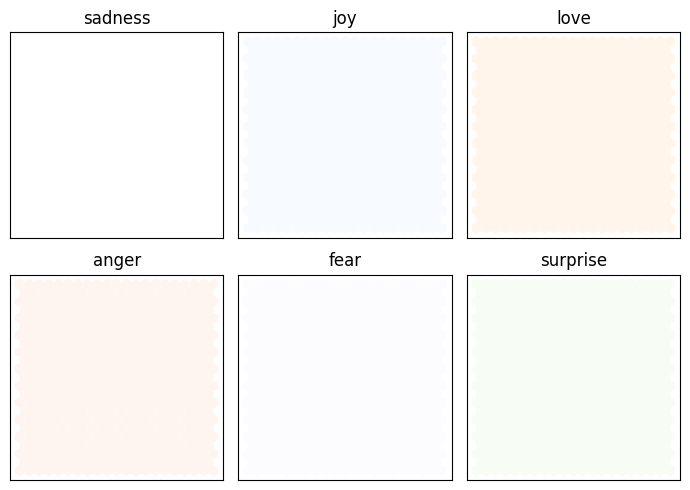

In [ ]:
fig, axes = plt.subplots(2, 3,
                         figsize = (7,5))
axes = axes.flatten()


cmaps = ["Greys",
         "Blues",
         "Oranges",
         "Reds",
         "Purples",
         "Greens"]


labels = emotions["train"].features["label"].names

for i, (label, cmap) in enumerate(zip(labels,
                                      cmaps)):

    df_emb_sub = df_emb.query(f"label == {i}")

    axes[i].hexbin(df_emb_sub["X"],
                   df_emb_sub["Y"],
                   cmap = cmap,
                   gridsize = 20,
                   linewidths = (0,))
    
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

- The negative feelings such as sadness, anger, and fear all occupy similar regions with slightly varying distributions.
- joy and love are well separated from the negative emotions and also share a similar space.
- surprise is scattered all over the place

Note: The model was not trained to know the difference between these emotions. It only learned them implicitly by guessing the masked words in texts

Training a simple classifier

using these hidden states to train a logistic regression model with Scikit-learn

In [ ]:
from sklearn.linear_model import LogisticRegression

# We increase `max_iter` to guarantee convergence


lr_state = LogisticRegression(max_iter=3000)



lr_state.fit(X_train, y_train)


lr_state.score(X_valid, y_valid)

0.634

Examining whether our model is any good by comparing it against a simple baseline

In [ ]:
# using  Scikit-learn DummyClassifier that can be used to build a 
# classifier with simple heuristics such as always choosing the majority class
# or always drawing a random class. 


from sklearn.dummy import DummyClassifier


dummy_clss = DummyClassifier(strategy="most_frequent")

dummy_clss.fit(X_train, y_train)

dummy_clss.score(X_valid, y_valid)




0.352

our simple classifier with DistilBERT embeddings is significantly better than our baseline.

Confusion matrix of the classifier

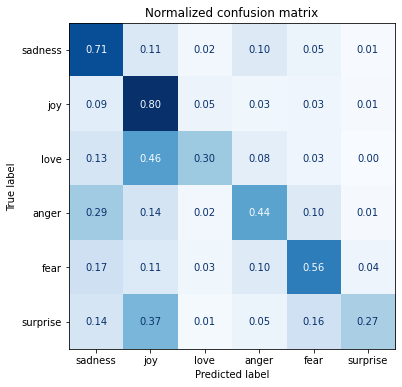

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds,
                          y_true,
                          labels):

    my_matrix = confusion_matrix(y_true, y_preds,
                          normalize = "true")

    fig, ax = plt.subplots(figsize = (6, 6))

    matrix_disp = ConfusionMatrixDisplay(confusion_matrix = my_matrix,
                                  display_labels = labels)

    matrix_disp.plot(cmap = "Blues",
              values_format = ".2f",
              ax = ax, 
              colorbar = False)
    
    plt.title("Normalized confusion matrix")
    plt.show()
    
y_preds = lr_state.predict(X_valid)

plot_confusion_matrix(y_preds,
                      y_valid,
                      labels)
     

- anger and fear are most often confused with sadness, which agrees with the observation we made when visualizing the embeddings. 
- Also, love and surprise are frequently mistaken for joy.


#Fine-Tuning Transformers

In [ ]:
# this code is for creating an AI model that can read sentences and classify them 
# into one of six different categories

from transformers import AutoModelForSequenceClassification

model_d = "distilbert-base-uncased"

num_labels = 6

model = (AutoModelForSequenceClassification.from_pretrained(model_d,
                                                            num_labels = num_labels).to(device))
     

Defining the metrics that we’ll use to evaluate our model’s performance

In [ ]:
from sklearn.metrics import accuracy_score, f1_score


def compute_metrics(pred):

  pred_labels = pred.label_ids

  preds = pred.predictions.argmax(-1)

  f1 = f1_score(pred_labels, 
                preds, 
                average="weighted") 
  
  acc = accuracy_score(pred_labels, 
                       preds)
  
  return {"accuracy": acc, "f1": f1}


In [ ]:
# from huggingface_hub import notebook_login

In [ ]:
# notebook_login()

Training the model

We set the:

- batch size
- learning rate
- number of epochs 
- specify to load the best model at the end of the training run.

In [ ]:
from transformers import Trainer, TrainingArguments

Bbase_model = "distilbert-base-uncased-finetuned-sst-2-english"

batch_size = 64

logging_steps = len(emotions_encoded["train"]) // batch_size

emo_model_name = f"{Bbase_model}-finetuned-emotion"


training_args = TrainingArguments(output_dir  = emo_model_name,
                                  
                                  num_train_epochs = 2,

                                  learning_rate = 2e-5,

                                  per_device_train_batch_size = batch_size,

                                  per_device_eval_batch_size = batch_size,

                                  weight_decay = 0.01,

                                  evaluation_strategy = "epoch",

                                  disable_tqdm = False,

                                  logging_steps = logging_steps,

                                  push_to_hub = False, 

                                  log_level = "error")
     

Instantiating and fine-tuning our model with the Trainer

In [ ]:
from transformers import Trainer

Bbase_model = "distilbert-base-uncased-finetuned-sst-2-english"


auto_tok = AutoTokenizer.from_pretrained(Bbase_model)


my_trainer = Trainer(model=model,
                   
                  args = training_args,

                  compute_metrics = compute_metrics,

                  train_dataset = emotions_encoded["train"],

                  eval_dataset = emotions_encoded["validation"],

                  tokenizer = auto_tok)
# Train the model
my_trainer.train


<bound method Trainer.train of <transformers.trainer.Trainer object at 0x7f308372db20>>

our model has an F1-score on the validation set of around 92%

In [ ]:
# To visualize the confusion matrix, we first need to get the predictions on the validation set.
# The predict() method of the Trainer class returns several useful objects we can use for evaluation

preds_output = my_trainer.predict(emotions_encoded["validation"])


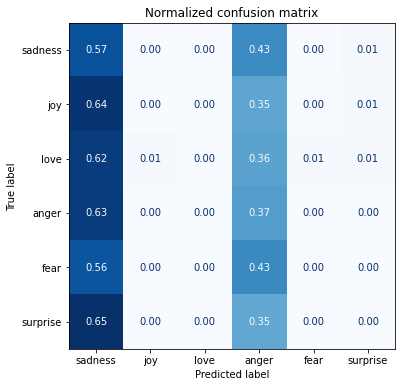

In [ ]:
# plot the confusion matrix

y_preds = np.argmax(preds_output.predictions,
                    axis=1)

plot_confusion_matrix(y_preds,
                      y_valid,
                      labels)


Error analysis

In [ ]:
from transformers import AutoTokenizer

model_ckpy = "distilbert-base-uncased"
nlp_tokenizer = AutoTokenizer.from_pretrained(model_ckpy)

In [ ]:
# Function that returns the loss along with the predicted label

from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):

    # Place all input tensors on the same device as the model
    inputs = {k:v.to(device) for k,v in batch.items() 
              if k in nlp_tokenizer.model_input_names}

    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits,
                                  axis =- 1)
        
        loss = cross_entropy(output.logits,
                             batch["label"].to(device), 
                             reduction = "none")

    # Place outputs on CPU for compatibility with other dataset columns   
    return {"loss": loss.cpu().numpy(), 
            "predicted_label": pred_label.cpu().numpy()}
     


In [ ]:
# applying this function to get the losses for all the samples
# Converting our dataset back to PyTorch tensors

emotions_encoded.set_format("torch", 
                            columns=["input_ids",
                                     "attention_mask",
                                     "label"])
# Compute loss values
emotions_encoded["validation"] = emotions_encoded["validation"].map(forward_pass_with_label,
                                                                    batched = True, 
                                                                    batch_size = 16)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
# creating a DataFrame with the texts, losses, and predicted/true labels

emotions_encoded.set_format("pandas")

cols = ["text",
        "label",
        "predicted_label",
        "loss"]

df_test = emotions_encoded["validation"][:][cols]

df_test["label"] = df_test["label"].apply(label_int2str)

df_test["predicted_label"] = (df_test["predicted_label"].apply(label_int2str))

In [ ]:
df_test.sort_values("loss", 
                    ascending = False).head(5)

,text,label,predicted_label,loss
1543,im glad i feel this way because if i didnt the...,love,anger,1.912048
147,ive been having more frequent hot flashes thro...,love,sadness,1.906105
1078,i have angel alone and although i feel a littl...,joy,sadness,1.895365
1889,i party darling don t close ss ur eyes just lo...,love,sadness,1.894030
940,ive been hiding my eyes between tight hands ra...,love,anger,1.893323


In [ ]:
df_test.sort_values("loss",
                    ascending = True).head(5)

,text,label,predicted_label,loss
1266,i do things according to my own feelings intui...,sadness,sadness,1.675203
776,i have a mini list of good things about me tha...,sadness,sadness,1.676688
626,i bet yahoo feel pretty shitty right now,sadness,sadness,1.677696
657,i don t know when i will want to tell her and ...,sadness,sadness,1.680022
349,i feel so dumb photographing myself okay i eve...,sadness,sadness,1.682497


In [ ]:
# mytrainer.push_to_hub(commit_message="Training completed!")

In [ ]:
from transformers import pipeline


# Change `transformersbook` to your Hub username
model_id = "transformersbook/distilbert-base-uncased-finetuned-emotion"

classifier = pipeline("text-classification",
                      model = model_id)

In [ ]:
custom_tweet = "I am quite satisfy with my product "
    
preds = classifier(custom_tweet,
                   return_all_scores = True)

/usr/local/lib/python3.9/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


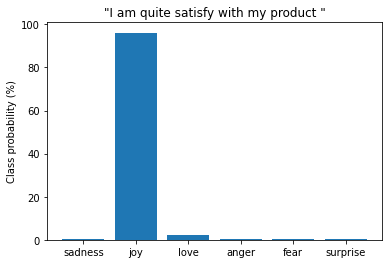

In [ ]:
prediction_df = pd.DataFrame(preds[0])
    
plt.bar(labels, 100 * prediction_df["score"], color='C0')


plt.title(f'"{custom_tweet}"')

plt.ylabel("Class probability (%)")
plt.show()